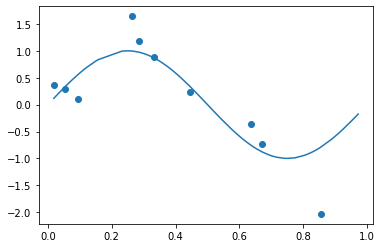

In [9]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from random import sample
from scipy.stats import norm

def expAndVar(x, X, t, sigma):
    pdf = norm.pdf(x - X.reshape(10, 1), loc = 0, scale = sigma).T
    pdf = pdf/(pdf.sum(axis = 1,keepdims = True))

    exp = (pdf * t.reshape(1, 10)).sum(axis = 1)
    var = np.sqrt(sigma**2 +  (pdf * t.reshape(1, 10)**2).sum(axis = 1) - exp**2)
    return exp, var

x = np.random.uniform(0, 1, 100)
x = np.array(sorted(x))
x_train = np.array(sorted(sample(list(x), 10)))
y_train = np.sin(2 * np.pi * x_train) + rand.randn(10) * 0.5
target = np.sin(2 * np.pi * x)

plt.plot(x,target)
plt.scatter(x_train,y_train) 
plt.show()

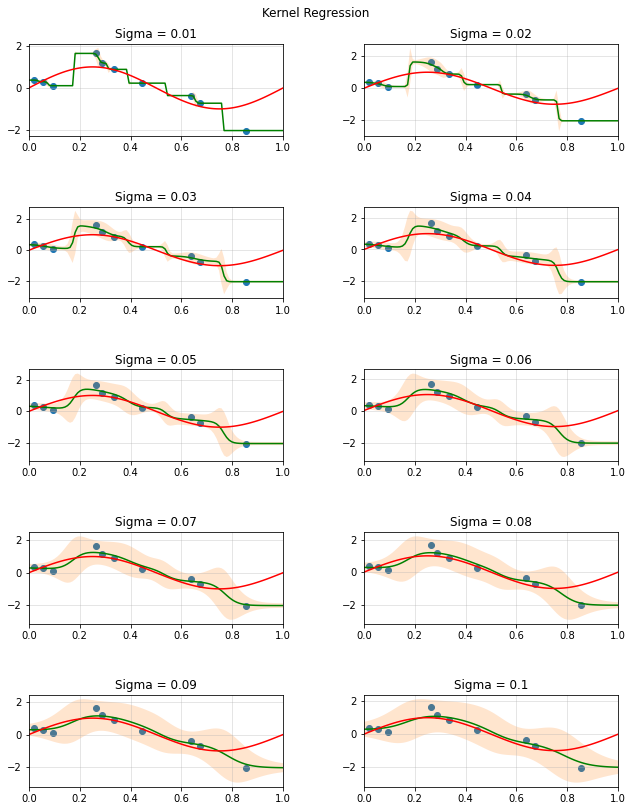

In [10]:
x_test = np.linspace(0,1,100) 
sigmas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08 , 0.09, 0.1]

fig, axes = plt.subplots(5,2, figsize=(10,12))
fig.tight_layout(pad=5)
for sigma, axis in zip(sigmas, axes.ravel()):
    E,V = expAndVar(x_test,x_train,y_train,sigma)
    axis.scatter(x_train,y_train)
    axis.plot(x_test,E,color='green')
    axis.fill_between(x_test,E - 2*V, E + 2*V, alpha = 0.2)
    axis.plot(x_test,np.sin(2*np.pi*x_test), color="red")
    axis.grid(alpha=0.4)
    axis.set_title("Sigma = " f"{sigma}")
    axis.set_xlim(0, 1);
plt.suptitle("Kernel Regression")
plt.show()

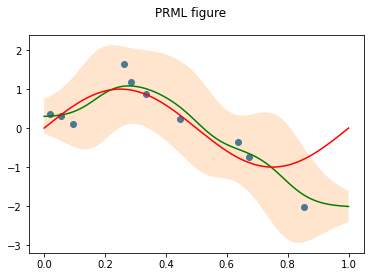

In [11]:
E,V = expAndVar(x_test,x_train,y_train,sigma=0.1)
plt.scatter(x_train,y_train)
plt.plot(x_test,E,color='green')
plt.fill_between(x_test,E - 2*V, E + 2*V, alpha = 0.2)
plt.plot(x_test,np.sin(2*np.pi*x_test), color="red")
plt.suptitle("PRML figure")
plt.show()